# Data Analysis: TITANIC

## Dataset explanation

The Titanic dataset is a dataset obtained from one of the most famous shipwrecks in history, the Titanic.

On her maiden voyage on April 15, 1912, the RMS Titanic was deemed the "unsinkable" ship that sank due to a collision with an iceberg. Unfortunately, there were not enough lifeboats to accommodate all the passengers.

While there is a lot of luck going into survival, it seems that some groups of people are more likely to survive than others.

Dataset Source: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

## Explanation of Data Analysis

At this stage, data exploration will be carried out which includes preprocessing. So that every feature of the explored data will be clean from Null Values and each feature will have a data type that matches the data dictionary. Data exploration is carried out in several stages and is carried out based on data groups.

## Feature Description

- survive = Passengers who are survive or not survive
- pclass = Class of ticket
- sex = Passenger gender
- age = Passenger age in years
- sibsp = # of siblings / spouses aboard the Titanic
- parch = # of parents / children aboard the Titanic
- fare = Passenger fare
- embarked = Port of Embarktion
- class = Class of ticket
- who = Call for passengers
- adult_male = Adult male passenger
- deck = Passenger deck
- embarked = Port of Embarktion
- alive = Passengers who are survive or not survive
- alone = Single passenger

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as ss

import warnings
warnings.filterwarnings("ignore")

## Overview

> Load the data data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

> Show 5 first and last data

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


> Take several columns that will be used, because there are several columns that have the same value, for example, survived and alive.

In [6]:
df_temp = df[["alive", "class", "sex", "age", "sibsp", "parch",
              "fare", "embark_town"]]
df_temp.head()

,alive,class,sex,age,sibsp,parch,fare,embark_town
0,no,Third,male,22.0,1,0,7.2500,Southampton
1,yes,First,female,38.0,1,0,71.2833,Cherbourg
2,yes,Third,female,26.0,0,0,7.9250,Southampton
3,yes,First,female,35.0,1,0,53.1000,Southampton
4,no,Third,male,35.0,0,0,8.0500,Southampton


> Show dataset information

In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alive        891 non-null    object 
 1   class        891 non-null    object 
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  889 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


In [8]:
df_temp.shape

(891, 8)

## Data Preprocessing

> Cleaning the data that has a null value and change the data type of data that has an incorrect data type.

### 1. Filling null values in the age column

> Fills null value for age column with proxy method based on gender and class column. Where to use the average value to fill in the null values. Null values in the age column are of type Missing at Random.

In [9]:
df_null = df_temp[df_temp["age"].isna()]
df_not_null = df_temp[df_temp["age"].notna()]

In [10]:
df_null.head()

,alive,class,sex,age,sibsp,parch,fare,embark_town
5,no,Third,male,NaN,0,0,8.4583,Queenstown
17,yes,Second,male,NaN,0,0,13.0000,Southampton
19,yes,Third,female,NaN,0,0,7.2250,Cherbourg
26,no,Third,male,NaN,0,0,7.2250,Cherbourg
28,yes,Third,female,NaN,0,0,7.8792,Queenstown


In [11]:
df_not_null["age"] = df_not_null["age"].astype(int)
df_not_null.head()

,alive,class,sex,age,sibsp,parch,fare,embark_town
0,no,Third,male,22,1,0,7.2500,Southampton
1,yes,First,female,38,1,0,71.2833,Cherbourg
2,yes,Third,female,26,0,0,7.9250,Southampton
3,yes,First,female,35,1,0,53.1000,Southampton
4,no,Third,male,35,0,0,8.0500,Southampton


In [12]:
df_not_null.groupby(["sex", "class"], as_index=False)["age"].mean()

,sex,class,age
0,female,First,34.611765
1,female,Second,28.716216
2,female,Third,21.725490
3,male,First,41.267327
4,male,Second,30.707071
5,male,Third,26.482213


> The data above can be used as a reference to fill in the null values in the age column.

In [13]:
age = []
for sex, pclass in zip(df_null["sex"], df_null["class"]):
    if sex == "female":
        if pclass == 1:
            age.append(35)
        elif pclass == 2:
            age.append(29)
        else:
            age.append(22)
    else:
        if pclass == 1:
            age.append(41)
        elif pclass == 2:
            age.append(31)
        else:
            age.append(27)

In [14]:
df_null["age"] = age
df_null.head()

,alive,class,sex,age,sibsp,parch,fare,embark_town
5,no,Third,male,27,0,0,8.4583,Queenstown
17,yes,Second,male,27,0,0,13.0000,Southampton
19,yes,Third,female,22,0,0,7.2250,Cherbourg
26,no,Third,male,27,0,0,7.2250,Cherbourg
28,yes,Third,female,22,0,0,7.8792,Queenstown


In [15]:
df_clean = pd.concat([df_not_null, df_null])
df_clean['age'].astype('int64')
df_clean.head()

,alive,class,sex,age,sibsp,parch,fare,embark_town
0,no,Third,male,22,1,0,7.2500,Southampton
1,yes,First,female,38,1,0,71.2833,Cherbourg
2,yes,Third,female,26,0,0,7.9250,Southampton
3,yes,First,female,35,1,0,53.1000,Southampton
4,no,Third,male,35,0,0,8.0500,Southampton


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alive        891 non-null    object 
 1   class        891 non-null    object 
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  889 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


### 2. Eliminate null values

> Deleting data (2 rows of data) that have null values because it is a type of Missing Completely at Random.

In [17]:
df_clean = df_clean.dropna()

In [18]:
df_clean.head()

,alive,class,sex,age,sibsp,parch,fare,embark_town
0,no,Third,male,22,1,0,7.2500,Southampton
1,yes,First,female,38,1,0,71.2833,Cherbourg
2,yes,Third,female,26,0,0,7.9250,Southampton
3,yes,First,female,35,1,0,53.1000,Southampton
4,no,Third,male,35,0,0,8.0500,Southampton


### 3. See the results after doing data preprocessing

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alive        889 non-null    object 
 1   class        889 non-null    object 
 2   sex          889 non-null    object 
 3   age          889 non-null    int64  
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embark_town  889 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.5+ KB


> Uses `describe()` to see the measure of central tendency, quartile, min, and max for each feature.

In [20]:
df_clean.describe()

,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000
mean,28.802025,0.524184,0.382452,32.096681
std,13.121108,1.103705,0.806761,49.697504
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


> Uses `describe()` to see unique (different categories), top (most data appears), and freq (frequently appearing data) values for categorical data.

In [21]:
df_clean.describe(include='object').T

,count,unique,top,freq
alive,889,2,no,549
class,889,3,Third,491
sex,889,2,male,577
embark_town,889,3,Southampton,644


## Exploratory Data Analysis (EDA)

> Start this process by looking at the target feature first.

### Target Feature

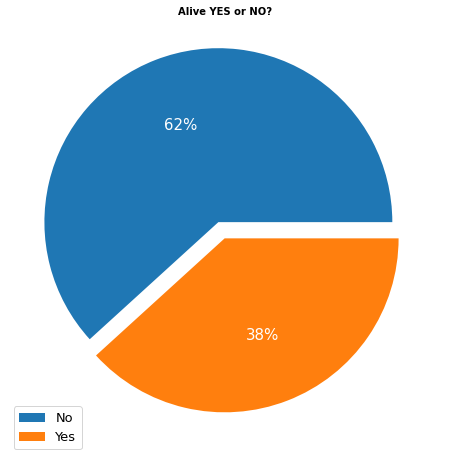

In [22]:
plt.figure(figsize=(10, 8))
plt.title("Alive YES or NO?", size=10, fontweight='bold')
plt.pie(df_clean['alive'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

In [23]:
df_clean['alive'].value_counts()

no     549
yes    340
Name: alive, dtype: int64

> From the data above, we can see that 340 passengers survived from a total of 889 passengers.

### Numerical Features

<AxesSubplot:>

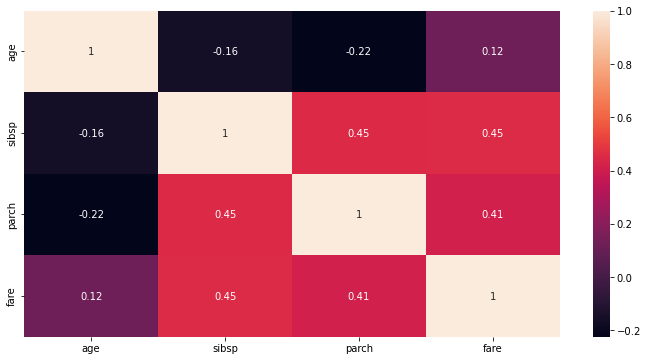

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.select_dtypes(['int64', 'float64']).corr('spearman'),
            annot=True)

> From these data, we can see that
> 1. The `sibsp` column with `parch` and `fare` columns has a correlation coefficient of **0.45** and can be categorized as **low correlation**.
> 2. The `parch` column with the `fare` column has a correlation coefficient of **0.41** and can be categorized as **low correlation**.

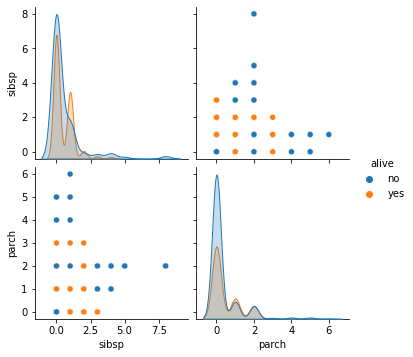

In [25]:
# sibsp vs parch

sns.pairplot(df_clean[['sibsp', 'parch', 'alive']], hue="alive")

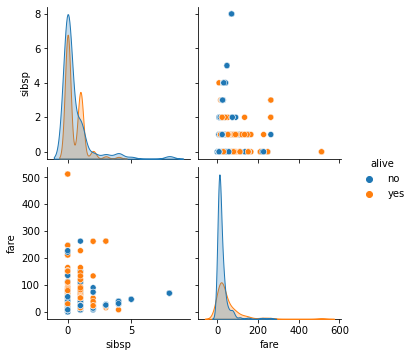

In [26]:
# sibsp vs fare

sns.pairplot(df_clean[['sibsp', 'fare', 'alive']], hue="alive")

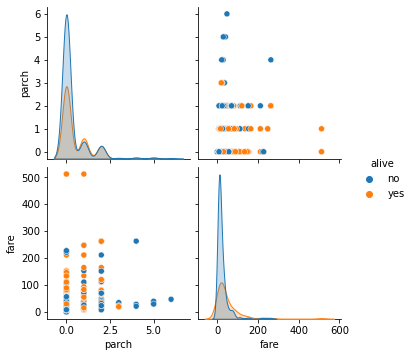

In [27]:
# parch vs fare

sns.pairplot(df_clean[['parch', 'fare', 'alive']], hue="alive")

> From the `pairplot` it can be seen that the pattern of passengers who **survived** are passengers who go **alone** or with **family** (siblings / parents) as many as **1-2 people** family members and buy Titanic tickets from **various fares**.

> Meanwhile, passengers who are **not survive** are passengers who **go with family** between **4-8 members** families who bought Titanic tickets ranged from **0 - 50 pounds**.

In [28]:
df_con_new = df_clean.select_dtypes(['int64', 'float64'])

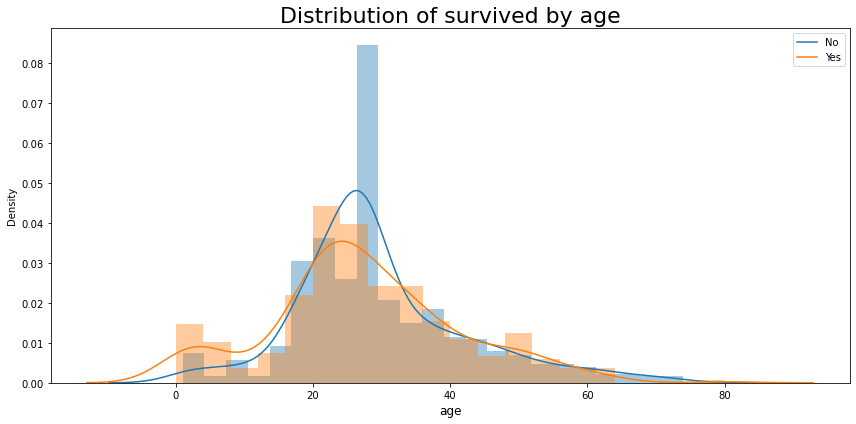

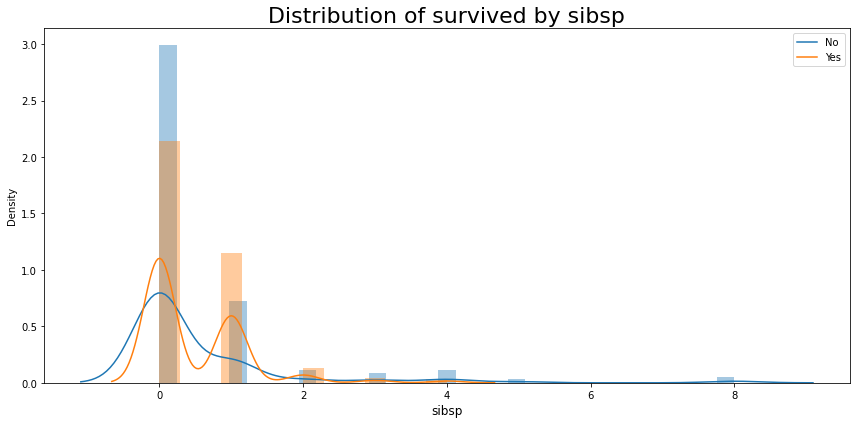

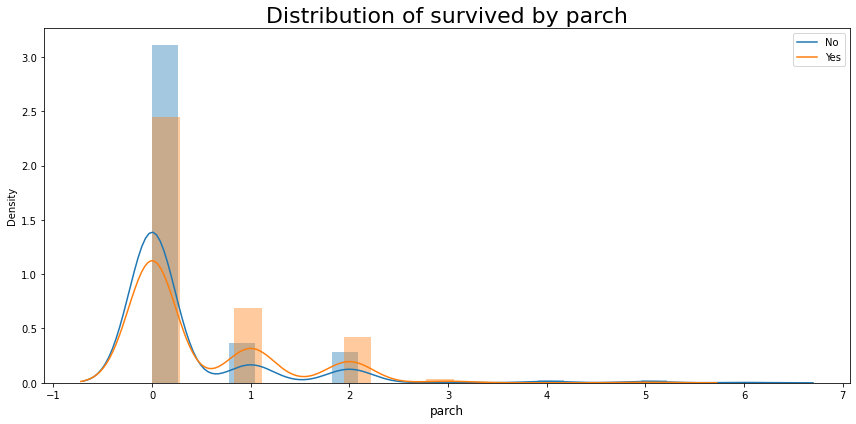

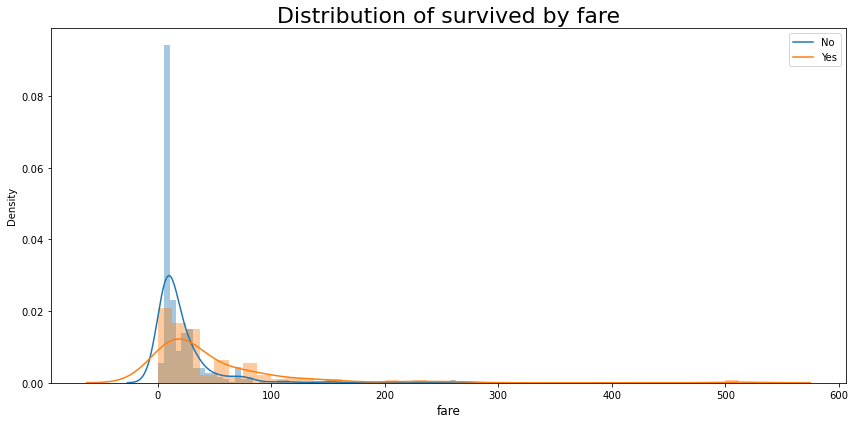

In [29]:
for i in df_con_new.columns:
    plt.figure(figsize=(12, 6))
    ax = sns.distplot(df_clean[(df_clean['alive'] == 'no')][i])
    ax = sns.distplot(df_clean[(df_clean['alive'] == 'yes')][i])

    ax.legend(['No', 'Yes'])

    plt.xlabel(i, fontsize=12)
    plt.title('Distribution of survived by ' + i, fontsize=22)

    plt.tight_layout()
    plt.show()

In [30]:
con_alive = df_con_new[df_clean['alive'] == 'yes']
con_not_alive = df_con_new[df_clean['alive'] == 'no']
for i in con_alive.columns:
    print(f"Survived by {i}")
    print(con_alive[i].value_counts().head())
    print(f"Not Survived by {i}")
    print(con_not_alive[i].value_counts().head())
    print("\n")

Survived by age
22    47
27    27
24    15
35    11
36    11
Name: age, dtype: int64
Not Survived by age
27    115
22     33
28     20
21     19
30     17
Name: age, dtype: int64


Survived by sibsp
0    208
1    112
2     13
3      4
4      3
Name: sibsp, dtype: int64
Not Survived by sibsp
0    398
1     97
4     15
2     15
3     12
Name: sibsp, dtype: int64


Survived by parch
0    231
1     65
2     40
3      3
5      1
Name: parch, dtype: int64
Not Survived by parch
0    445
1     53
2     40
5      4
4      4
Name: parch, dtype: int64


Survived by fare
13.00    16
26.00    15
7.75     12
10.50     9
26.55     8
Name: fare, dtype: int64
Not Survived by fare
8.0500     38
7.8958     37
13.0000    26
7.7500     22
26.0000    16
Name: fare, dtype: int64




> From the data above, we can detail the previous explanation, that
> 1. Most of the passengers who did **not survive** were passengers who were **27 years old** and most of the passengers who **survived** were **22 years old**.
> 2. More passengers do **not survive** when traveling alone or with **4-8 other family members**. While passengers who go with **1-2 other family members** tend to **survive** more.
> 3. A lot of passengers who buy tickets with fares **under 20 pounds** are **not survive**.

### Categorical Data

> Calculates the correlation on each feature.

> Change categorical string data to numeric categorical.

In [31]:
df_ctg = df_clean.select_dtypes(exclude=['float', 'int'])
for i in df_ctg.columns:
    df_ctg[i] = df_clean[i].astype('category').cat.codes

In [32]:
df_ctg.head()

,alive,class,sex,embark_town
0,0,2,1,2
1,1,0,0,0
2,1,2,0,2
3,1,0,0,2
4,0,2,1,2


- alive (0 = no, 1 = yes)
- class (0 = first, 1 = second, 2 = third)
- sex (0 = female, 1 = male)
- embark_town (0 = Cherbourg, 1 = Queenstown, 2 = Southampton)

<AxesSubplot:>

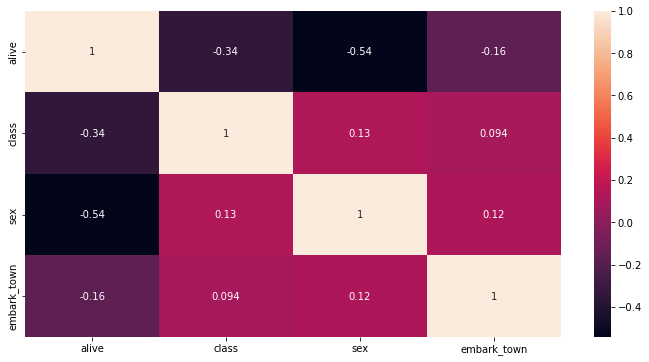

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_ctg.corr('spearman'), annot=True)

> From the correlation coefficient above, it can be seen that all categories have **no correlation**. The highest correlation coefficient in this matrix is **class** with **sex** of **0.13** and **sex** with **embark town** of **0.12**. The two correlations are included in the **correlation that can be ignored**.

In [34]:
df_categ = df_clean.select_dtypes(['object'])

> Using `crosstab()` to find out more details about the previously searched correlation.

In [35]:
pd.crosstab(df_categ['class'], df_categ['sex'], normalize=True)

sex,female,male
class,,
First,0.103487,0.137233
Second,0.085489,0.121485
Third,0.161980,0.390326


> It can be seen from the `crosstab` above, that the most **not survive** passengers were **male** passengers who bought **3rd class** tickets.

In [36]:
pd.crosstab(df_categ['sex'], df_categ['embark_town'], normalize=True)

embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,0.082115,0.040495,0.228346
male,0.106862,0.046119,0.496063


> It can be seen from the `crosstab` above, that the most **not survive** passengers were **male** passengers who departed from the port of **Southampton**.

> Do a thorough exploration of the category features. The live column is dropped because it is a target feature and has been visualized at the beginning.

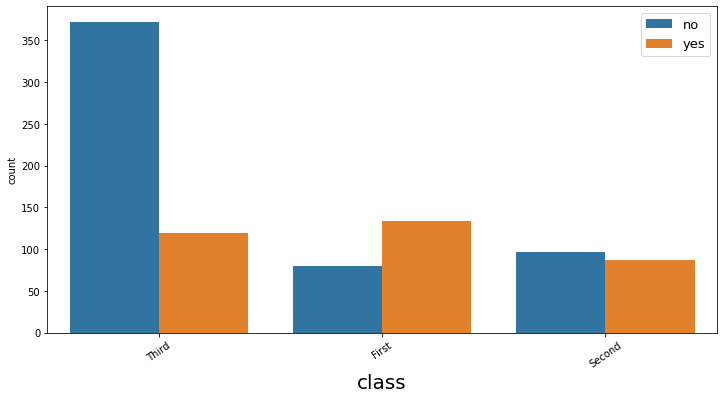

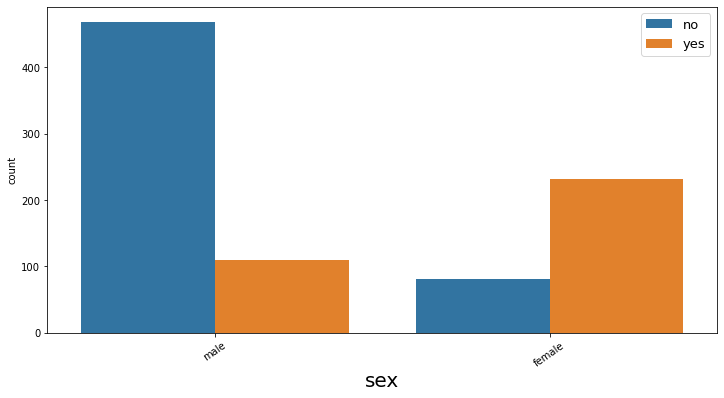

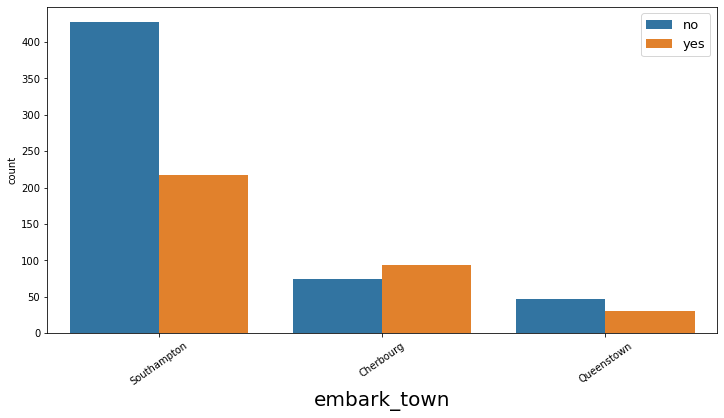

In [37]:
for i in df_categ.drop(columns=['alive']):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=i, data=df_clean, hue='alive')
    plt.legend(loc='upper right', fontsize=13)
    plt.xlabel(i, fontsize=20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

In [38]:
cat_alive = df_categ[df_categ['alive'] == 'yes']

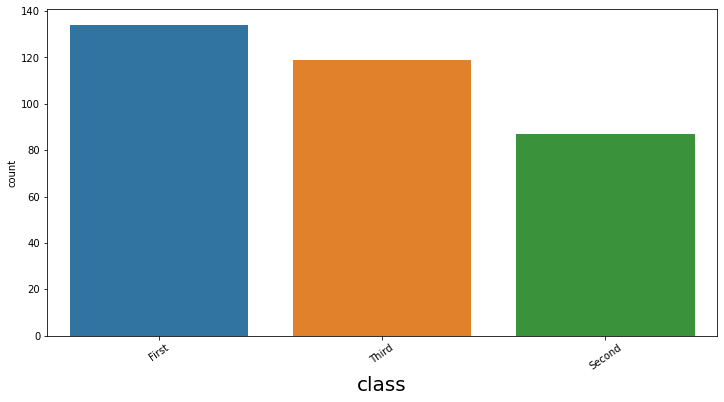

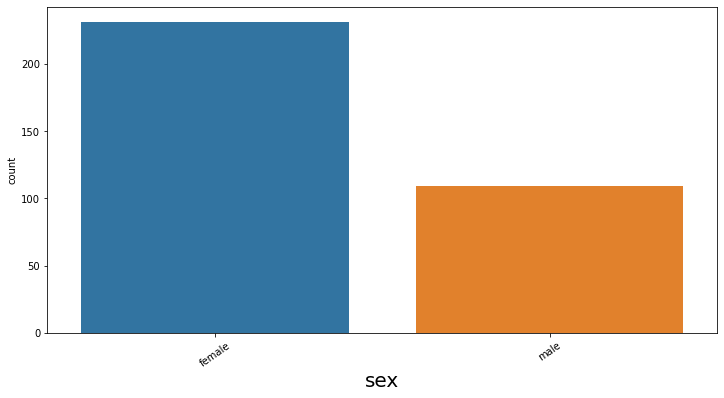

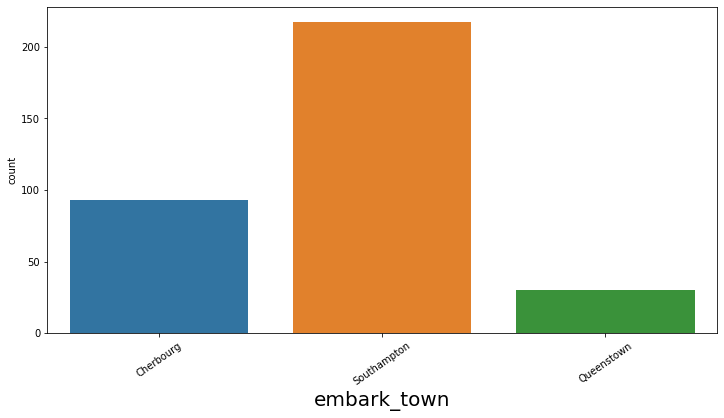

In [39]:
for i in cat_alive.drop(columns=['alive']):
    plt.figure(figsize=(12, 6))
    sns.countplot(cat_alive[i])
    plt.xlabel(i, fontsize=20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

> From the visualization above, it can be seen that many of the passengers who **survived** came from **first class** and/or were **female** and/or departed from the port of **Southampton**.

## Summary

The Titanic passengers who did not survive were 62% (549 passengers) and those who survived were 38% (340 passengers) with a total of 889 passengers.

There is a low correlation between sibsp column with parch and fare, and parch column with fare. From this correlation, it can be concluded that
1. Most of the passengers who survived were passengers who traveled alone or with 1-2 family members and/or were 22 years old.

2. Most of the passengers who did not survive were passengers who went with more than 4 family members and/or bought tickets for under 20 pounds and/or were around 27 years old.

There is no correlation between categorical data, but there is information that can be seen
1. Many of the passengers who did not survive came from passengers who had third class tickets, while many of the survivors came from frist class tickets.

2. More male passengers died than female passengers.

3. More than half of passengers departing from Southampton did not survive and compared to 2 other port.

4. Passengers who survived Cherbourg more than passengers who did not survive. When compared to other port, the port of Cherbourg is the only port that has a higher level of passenger survive compared to passengers who did not survive.